# Project 1

## Part 1 - Rat sighting data analysis

First lets import our packages. We'll be using tidyverse and dslabs to wrangle our rat sigtings data and make some plots

In [44]:
install.packages('foreign')

Warning message:
"package 'foreign' is not available (for R version 3.6.1)"

In [62]:
#install.packages('choroplethr')
#install.packages("devtools")
#library(devtools)
install_github('arilamstein/choroplethrZip@v1.3.0')
#library(choroplethrZip)



Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.


jsonlite  (1.6    -> 1.7.1 ) [CRAN]
Rcpp      (1.0.1  -> 1.0.5 ) [CRAN]
digest    (0.6.18 -> 0.6.25) [CRAN]
evaluate  (0.13   -> 0.14  ) [CRAN]
stringi   (1.4.6  -> 1.5.3 ) [CRAN]
htmltools (0.3.6  -> 0.5.0 ) [CRAN]
uuid      (0.1-2  -> 0.1-4 ) [CRAN]
rgdal     (1.5-17 -> 1.5-18) [CRAN]


Skipping 1 packages not available: foreign
Installing 9 packages: jsonlite, Rcpp, digest, evaluate, stringi, htmltools, foreign, uuid, rgdal


ERROR: Error: Failed to install 'choroplethrZip' from GitHub:
  (converted from warning) package 'foreign' is not available (for R version 3.6.1)


In [53]:
#install.packages('dslabs')
library(ggmap)
library(ggplot2)
library(tidyr)
library(tidyverse)
library(dslabs)
library(lubridate)

Warning message:
"package 'ggmap' was built under R version 3.6.3"Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [4]:
rats_raw <- read_csv("data/Rat_Sightings.csv", na = c("", "NA", "N/A"))
# If you get an error that says "All formats failed to parse. No formats
# found", it's because the mdy_hms function couldn't parse the date. The date
# variable *should* be in this format: "04/03/2017 12:00:00 AM", but in some
# rare instances, it might load without the seconds as "04/03/2017 12:00 AM".
# If there are no seconds, use mdy_hm() instead of mdy_hms().
rats_clean <- rats_raw %>%
  rename(created_date = `Created Date`,
         location_type = `Location Type`,
         borough = Borough) %>%
  mutate(created_date = mdy_hms(created_date)) %>%
  mutate(sighting_year = year(created_date),
         sighting_month = month(created_date),
         sighting_day = day(created_date),
         sighting_weekday = wday(created_date, label = TRUE, abbr = FALSE)) %>%
  filter(borough != "Unspecified")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_character(),
  `Unique Key` = col_double(),
  `Incident Zip` = col_double(),
  `Facility Type` = col_logical(),
  `Due Date` = col_logical(),
  `X Coordinate (State Plane)` = col_double(),
  `Y Coordinate (State Plane)` = col_double(),
  `Vehicle Type` = col_logical(),
  `Taxi Company Borough` = col_logical(),
  `Taxi Pick Up Location` = col_logical(),
  `Bridge Highway Name` = col_logical(),
  `Bridge Highway Direction` = col_logical(),
  `Road Ramp` = col_logical(),
  `Bridge Highway Segment` = col_logical(),
  Latitude = col_double(),
  Longitude = col_double()
)
i Use `spec()` for the full column specifications.

Warning message:
"132232 parsing failures.
 row      col           expected                 actual                     file
2247 Due Date 1/0/T/F/TRUE/FALSE 08/28/2018 12:29:04 PM 'data/Rat_Sightings.csv'
2248 Due Date 1/0/T/F/TRU

In [ ]:
rats_raw$Closed Date

In [5]:
head(rats_raw)

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
47782138,10/04/2020 02:07:51 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Catch Basin/Sewer,10007,292 GREENWICH STREET,...,NA,NA,NA,NA,NA,NA,NA,40.71602,-74.01104,"(40.71601701964443, -74.01103839517805)"
47781357,10/04/2020 01:07:34 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11226,120 EAST 19 STREET,...,NA,NA,NA,NA,NA,NA,NA,40.64644,-73.96155,"(40.64643937078732, -73.96155364982612)"
47784412,10/04/2020 03:54:51 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10460,811 EAST 178 STREET,...,NA,NA,NA,NA,NA,NA,NA,40.84449,-73.88691,"(40.84448706226224, -73.8869089837199)"
47782513,10/04/2020 01:14:24 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10026,7 AVENUE,...,NA,NA,NA,NA,NA,NA,NA,40.80003,-73.95486,"(40.800030819492065, -73.9548552168686)"
47782170,10/04/2020 08:28:15 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206,890 FLUSHING AVENUE,...,NA,NA,NA,NA,NA,NA,NA,40.70209,-73.93623,"(40.70208667656569, -73.93622510731538)"
47783865,10/04/2020 08:10:26 AM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11429,215-01 104 AVENUE,...,NA,NA,NA,NA,NA,NA,NA,40.71203,-73.74355,"(40.712034705477286, -73.74354902753882)"


sighting_weekday,n
Sunday,14485
Monday,26580
Tuesday,26076
Wednesday,25583
Thursday,24530
Friday,21949
Saturday,14389


sighting_weekday,borough,sighting_year,n
Sunday,BRONX,2010,159
Sunday,BRONX,2011,145
Sunday,BRONX,2012,181
Sunday,BRONX,2013,166
Sunday,BRONX,2014,224
Sunday,BRONX,2015,270
Sunday,BRONX,2016,314
Sunday,BRONX,2017,357
Sunday,BRONX,2018,274
Sunday,BRONX,2019,242


`summarise()` regrouping output by 'sighting_weekday' (override with `.groups` argument)


sighting_weekday,borough,n
Sunday,BRONX,2524
Sunday,BROOKLYN,5154
Sunday,MANHATTAN,4193
Sunday,QUEENS,1987
Sunday,STATEN ISLAND,627
Monday,BRONX,5160
Monday,BROOKLYN,9444
Monday,MANHATTAN,6854
Monday,QUEENS,3883
Monday,STATEN ISLAND,1239


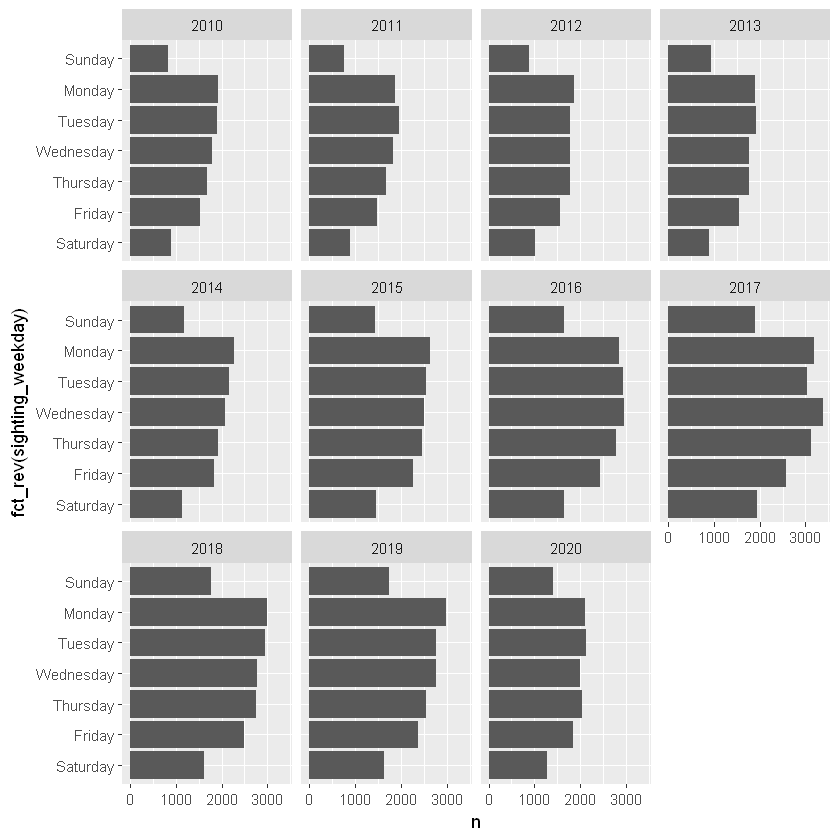

In [6]:
rats_clean %>%
  count(sighting_weekday)
# Assign a summarized data frame to an object to use it in a plot
rats_by_weekday <- rats_clean %>%
  count(sighting_weekday, sighting_year)
ggplot(rats_by_weekday, aes(x = fct_rev(sighting_weekday), y = n)) +
  geom_col() +
  coord_flip() +
  facet_wrap(~ sighting_year)
# See the count of rat sightings by weekday and borough
rats_clean %>%
  count(borough, sighting_year)
# An alternative to count() is to specify the groups with group_by() and then
# be explicit about how you're summarizing the groups, such as calculating the
# mean, standard deviation, or number of observations (we do that here with
# `n()`).
rats_clean %>%
  group_by(sighting_weekday, borough) %>%
  summarize(n = n())

# Part 1 - Rat

We are trying to get as specific as possible in our visualization in order to provide a better picture for each borough. We are specifically looking for the borough with the highest increase in rat sightings over the last decade. Our data suggests that Brooklyn is the borough that has a consistent increase in sightings whereas every other borough is consistently the same. We understand that Brooklyn does have a higher population as well as more land than some of the other boroughs, but the graph shows that the % increase of sightings in Brooklyn is higher than any other borough. This data implicates that there was a dramatic increase of rats over the years 2010-2019, but suddenly lowered this past year. You can clearly see every borough saw a decrease in rat sightings this past year, peaking in most boroughs in 2017. Future research should ask what might be the cause of the decrease in rat sightings over the past 3 years.


# Part 2 - Data Sources

## Integrated Public Use Microdata Series - Current Population Survey

### https://cps.ipums.org/cps/index.shtml

The Current Population Survey is a survey conducted by the US Cenesus Bureau every month of around 60,000 households. In the Economic Suppliment series there is survey data responces at the household and the invdividual level for employment, income, and health data. Most commonly known for being the source for BLS uneployment report statistics, this data contains trends that encompass America's economy over the past 50 years. Unlike summary reports from the census website, these are actual survey responces allowing for more detailed analysis at the person and family level. 



## S&P 500 Constituents  

### https://datahub.io/core/s-and-p-500-companies-financials

This file essentially contains stock market data. This data has some of the highlights of information used to understand and value the given stock. We can use this dataset to show many different aspects of the stock including price, EBITDA, earnings, PE ratio, and much more. This file is interesting because it would be very beneficial to figure out more about specific stocks and how they move. If you are able to make sound predictions in the stock market using data analytics, it could be an extremely powerful tool. If understood, we can even understand more about humans in general and why people seem to sell or buy at specific points.


## Estimating Low Income Job loss due to COVID-19

### https://github.com/UrbanInstitute/covid-neighborhood-job-analysis


This datafile accesses information on the number of low-income jobs lost due to covid19 in every state in the U.S. The U.S unemployment rate has taken the biggest hit since the great depression and it is important to see the spread of lost jobs throughout the nation.This dataset was provided by the Urban Institute Data and Research team. The Urban Institute monitors COVID-19 unemployment rates and establish policies to help protect families and communities






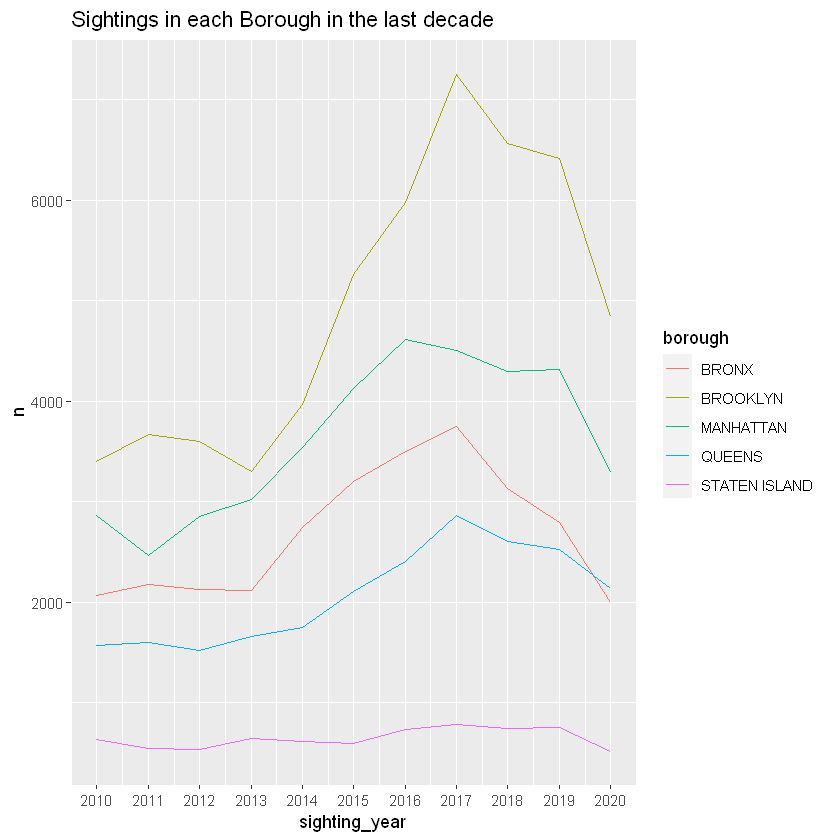

In [73]:
ggplot(data=boro, aes(x=sighting_year, y=n, colour=borough)) + scale_x_continuous(breaks = c(2010:2020)) + 
       geom_line() + ggtitle("Sightings in each Borough in the last decade")

Don't know how to automatically pick scale for object of type spec_tbl_df/tbl_df/tbl/data.frame. Defaulting to continuous.
ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (153601): x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         ret

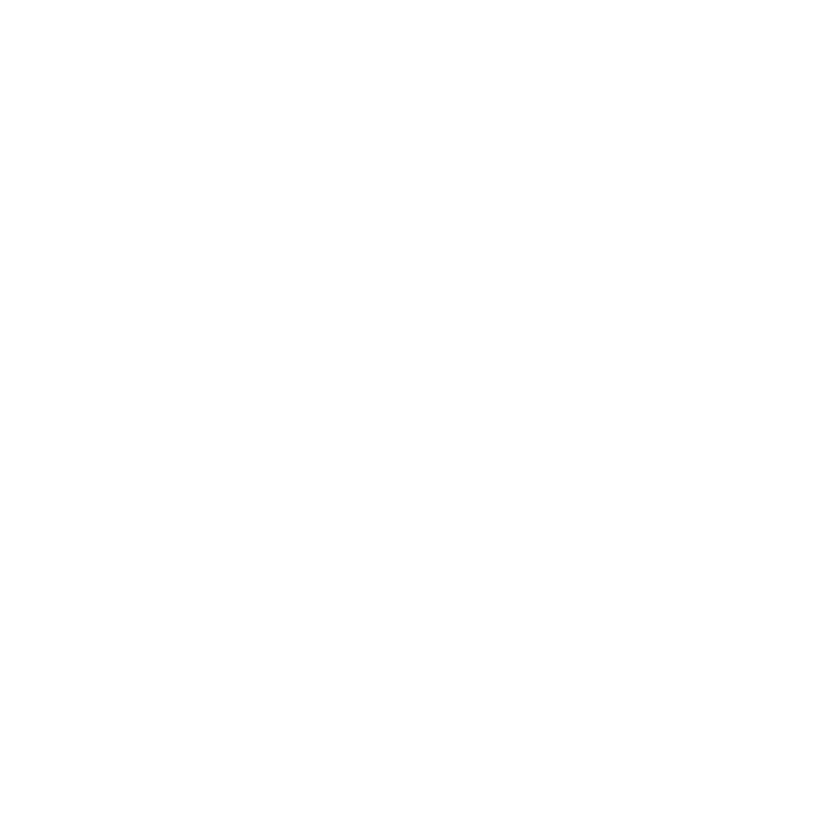

In [56]:
ggplot(data=rats_raw,
       aes(x=rats_clean, y=Longitude)) +
       geom_point() + ggtitle("Sightings by lattitude in the last decade")

In [72]:
rats_clean %>%
    filter(Latitude > 77)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

Unique Key,created_date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,location_type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,sighting_year,sighting_month,sighting_day,sighting_weekday


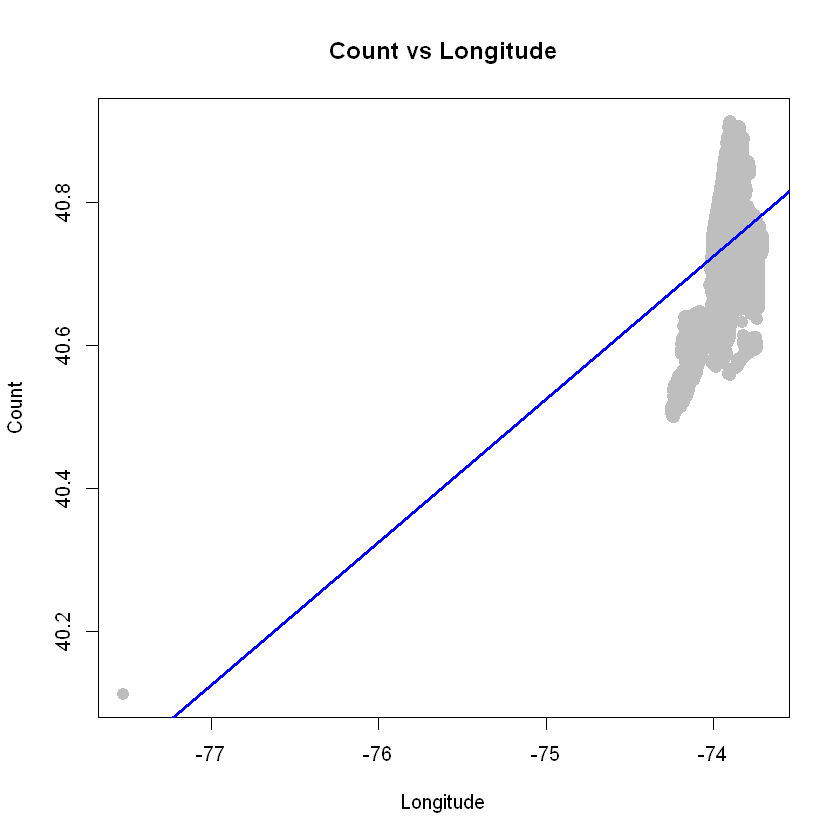

In [67]:
model = lm(Latitude ~ Longitude, data = rats_clean)
plot(Latitude ~ Longitude, data = rats_clean,
xlab = "Longitude",
ylab = "Count",
main = "Count vs Longitude",
pch = 20,
cex = 2,
col = "grey")
abline(model, lwd = 3, col = "blue")

In [51]:
boro

borough,sighting_year,n
BRONX,2010,2067
BRONX,2011,2174
BRONX,2012,2125
BRONX,2013,2120
BRONX,2014,2743
BRONX,2015,3201
BRONX,2016,3497
BRONX,2017,3746
BRONX,2018,3135
BRONX,2019,2790


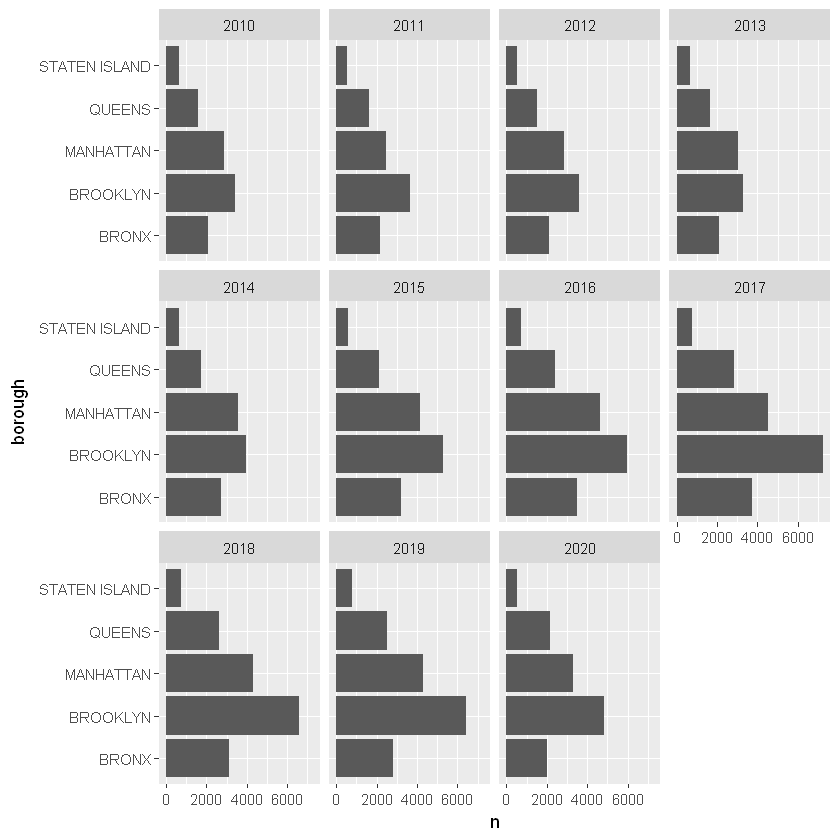

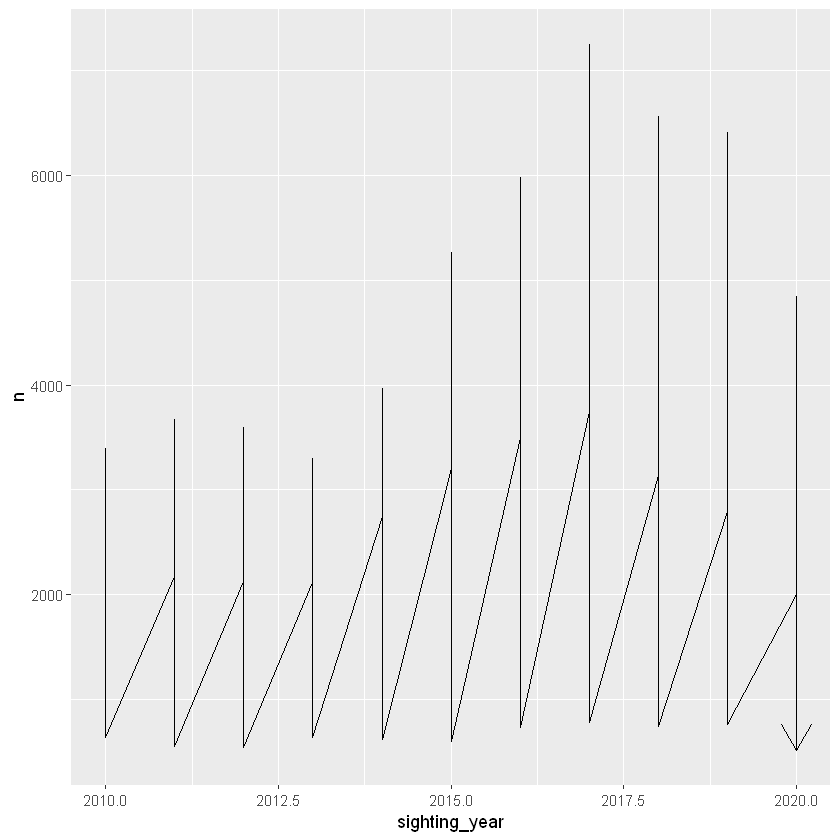

In [42]:
boro <- rats_clean %>%
  count(borough, sighting_year)



ggplot(boro, aes(x = borough, y = n)) +
  geom_col() +
  coord_flip() +
  facet_wrap(~ sighting_year)


In [46]:
rats_clean3 <- rats_raw %>%
  filter(borough != "Unspecified")

[1] "Unique Key"                     "Created Date"                  
 [3] "Closed Date"                    "Agency"                        
 [5] "Agency Name"                    "Complaint Type"                
 [7] "Descriptor"                     "local"                         
 [9] "Incident Zip"                   "Incident Address"              
[11] "Street Name"                    "Cross Street 1"                
[13] "Cross Street 2"                 "Intersection Street 1"         
[15] "Intersection Street 2"          "Address Type"                  
[17] "City"                           "Landmark"                      
[19] "Facility Type"                  "Status"                        
[21] "Due Date"                       "Resolution Action Updated Date"
[23] "Community Board"                "Borough"                       
[25] "X Coordinate (State Plane)"     "Y Coordinate (State Plane)"    
[27] "Park Facility Name"             "Park Borough"                  
[29] "Vehicle Type"                   "Taxi Company Borough"          
[31] "Taxi Pick Up Location"          "Bridge Highway Name"           
[33] "Bridge Highway Direction"       "Road Ramp"                     
[35] "Bridge Highway Segment"         "Latitude"                      
[37] "Longitude"                      "Location"

In [30]:
rats_raw <- rats_raw %>% rename(local = 'Location Type') 



colnames(rats_raw)

[1] "Unique Key"                     "Created Date"                  
 [3] "Closed Date"                    "Agency"                        
 [5] "Agency Name"                    "Complaint Type"                
 [7] "Descriptor"                     "local"                         
 [9] "Incident Zip"                   "Incident Address"              
[11] "Street Name"                    "Cross Street 1"                
[13] "Cross Street 2"                 "Intersection Street 1"         
[15] "Intersection Street 2"          "Address Type"                  
[17] "City"                           "Landmark"                      
[19] "Facility Type"                  "Status"                        
[21] "Due Date"                       "Resolution Action Updated Date"
[23] "Community Board"                "Borough"                       
[25] "X Coordinate (State Plane)"     "Y Coordinate (State Plane)"    
[27] "Park Facility Name"             "Park Borough"                  
[29] "Vehicle Type"                   "Taxi Company Borough"          
[31] "Taxi Pick Up Location"          "Bridge Highway Name"           
[33] "Bridge Highway Direction"       "Road Ramp"                     
[35] "Bridge Highway Segment"         "Latitude"                      
[37] "Longitude"                      "Location"

In [31]:
unique(rats_raw$'Location Type')

rats_raw %>%
  count(local)

Warning message:
"Unknown or uninitialised column: `Location Type`."

NULL

local,n
1-2 Family Dwelling,30879
1-2 Family Mixed Use Building,2629
1-3 Family Dwelling,15
1-3 Family Mixed Use Building,3
3+ Family Apartment Building,658
3+ Family Apt. Building,61824
3+ Family Mixed Use Building,10948
Abandoned Building,16
Apartment,82
Beach,2


In [15]:
rats_clean2 <- rats_raw %>%
  rename(created_date = `Created Date`,
         location_type = `Location Type`,
         borough = Borough) %>%
  mutate(created_date = mdy_hms(created_date)) %>%
  mutate(sighting_year = year(created_date)) %>%
  filter('Incident Zip' != "<NA>") %>%
    select('created_date','Incident Zip','borough','sighting_year')

rats_clean2 <- rats_clean2 %>% rename(zip = 'Incident Zip') 

In [16]:
head(rats_clean2)

created_date,zip,borough,sighting_year
2020-10-04 14:07:51,10007,MANHATTAN,2020
2020-10-04 13:07:34,11226,BROOKLYN,2020
2020-10-04 15:54:51,10460,BRONX,2020
2020-10-04 13:14:24,10026,MANHATTAN,2020
2020-10-04 20:28:15,11206,BROOKLYN,2020
2020-10-04 08:10:26,11429,QUEENS,2020


In [18]:
ziptotal <- rats_clean2 %>%
  count(zip)

In [64]:
?register_google

In [54]:
ny.map <- get_map("Central Park, New York, NY", color="bw",zoom=13)

ggmap(ny.map) + 
  geom_point(data=taxi.drop.met,
             aes(x=pickup_longitude,y=pickup_latitude),size=.03,alpha=0.3,color="blue")+
  geom_point(data=taxi.drop.met,
             aes(x=dropoff_longitude,y=dropoff_latitude),size=.03,alpha=0.3,color="red")+
   theme(axis.ticks = element_blank(),
        axis.text = element_blank())


ERROR: Error: Google now requires an API key.
       See ?register_google for details.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

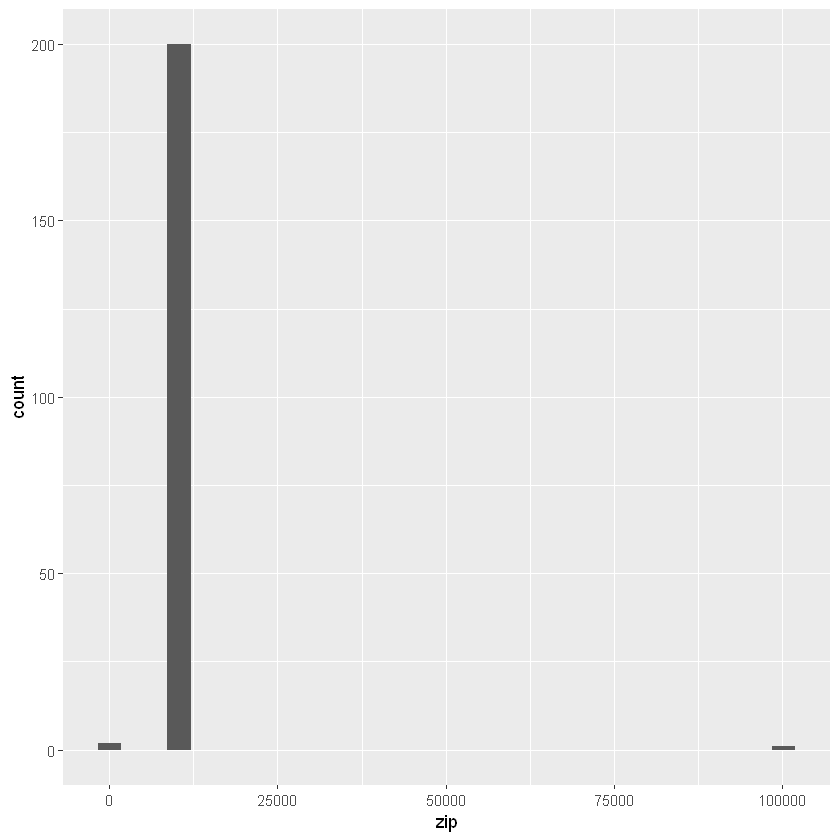

In [75]:
ggplot(ziptotal, aes(x=)) + geom_histogram()

In [43]:
ec_states = c("new york")

zip_choropleth(ziptotal, 
               state_zoom = ec_states, 
               title      = "2012 ZCTA Population Estimates",
               legend     = "Population") + coord_map()    

ERROR: Error in zip_choropleth(ziptotal, state_zoom = ec_states, title = "2012 ZCTA Population Estimates", : could not find function "zip_choropleth"


In [63]:
get_local_spot <-  get_map("New York", maptype = "roadmap", zoom = 10)


ERROR: Error: Google now requires an API key.
       See ?register_google for details.


In [ ]:
d <- 0.039
Ns <- c(1298, 533, 1342, 897, 774, 254, 812, 324, 1291, 1056, 2172, 516)
p <- (d + 1) / 2

polls <- map_df(Ns, function(N) {
  x <- sample(c(0,1), size=N,    replace=TRUE, prob=c(1-p, p))
  x_hat <- mean(x)
  se_hat <- sqrt(x_hat * (1 - x_hat) / N)
  list(estimate = 2 * x_hat - 1,
       low = 2*(x_hat - 1.96*se_hat) - 1,
       high = 2*(x_hat + 1.96*se_hat) - 1,
       sample_size = N)
}) %>% mutate(poll = seq_along(Ns))

polls

In [59]:
county_choropleth(ziptotal)

ERROR: Error in county_choropleth(ziptotal): could not find function "county_choropleth"


In [65]:
nyc <- c(lon = -74.0059, lat = 40.7128)
nyc_map <- get_map(location = nyc, zoom = 10)

ERROR: Error: Google now requires an API key.
       See ?register_google for details.
